In [35]:
from pprint import pprint

import spacepy.plot as spp
import numpy as np
import pymc as mc

%matplotlib inline


(array([ 29.,  34.,  31.,  22.,  27.,  19.,  27.,  18.,  16.,  20.,   8.,
         14.,  10.,   4.,   8.,   5.,   2.,   3.,   1.,   2.]),
 array([-0.99648722, -0.56149555, -0.12650388,  0.30848779,  0.74347946,
         1.17847112,  1.61346279,  2.04845446,  2.48344613,  2.9184378 ,
         3.35342947,  3.78842114,  4.22341281,  4.65840448,  5.09339615,
         5.52838781,  5.96337948,  6.39837115,  6.83336282,  7.26835449,
         7.70334616]),
 <a list of 20 Patch objects>)

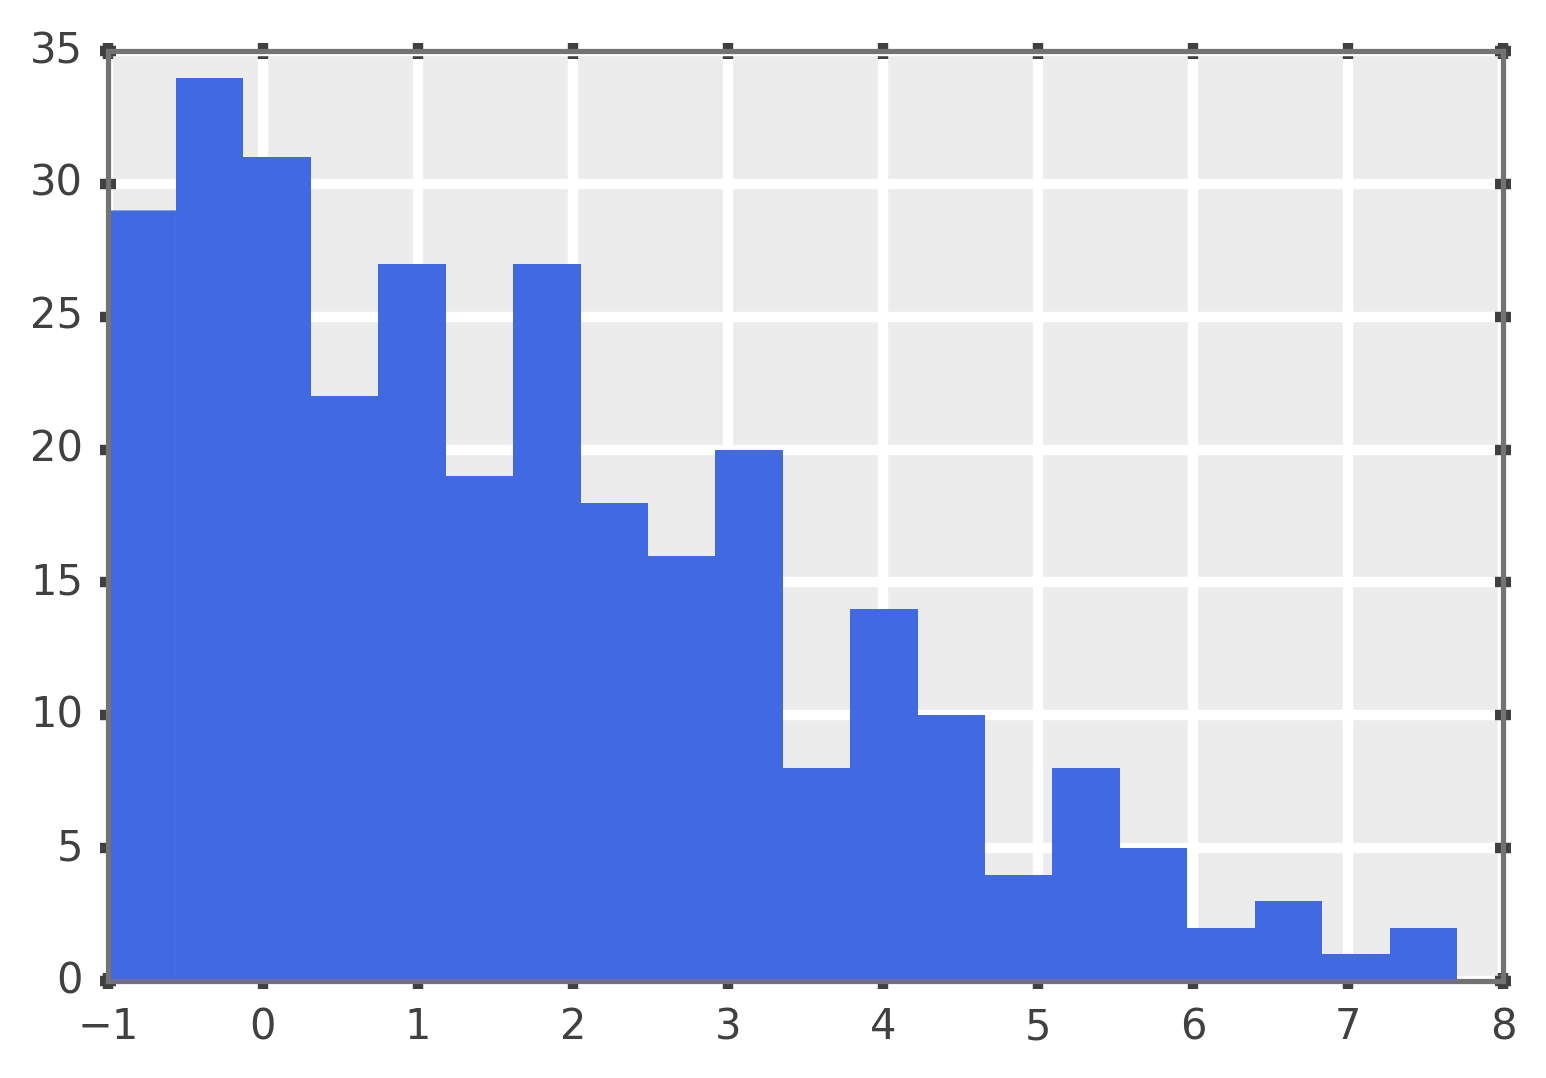

In [22]:
data = np.asarray([mc.TruncatedNormal(name='data', mu=0, tau=3**-2, a=-1, b=np.inf).value for v in range(300)])
spp.plt.hist(data, 20)

In [30]:
xcent = mc.Uniform('xcent', -10, 10)
spread = 3
x = mc.TruncatedNormal('x', xcent, spread**-2, -1, np.inf, observed=True, value=data)

In [31]:
model = mc.MCMC((xcent, spread, x))

 [-----------------100%-----------------] 54900 of 54900 complete in 8.0 secPlotting xcent

xcent:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.277           0.269            0.004            [-0.787  0.251]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.805           -0.457          -0.279         -0.089        0.239
	
None


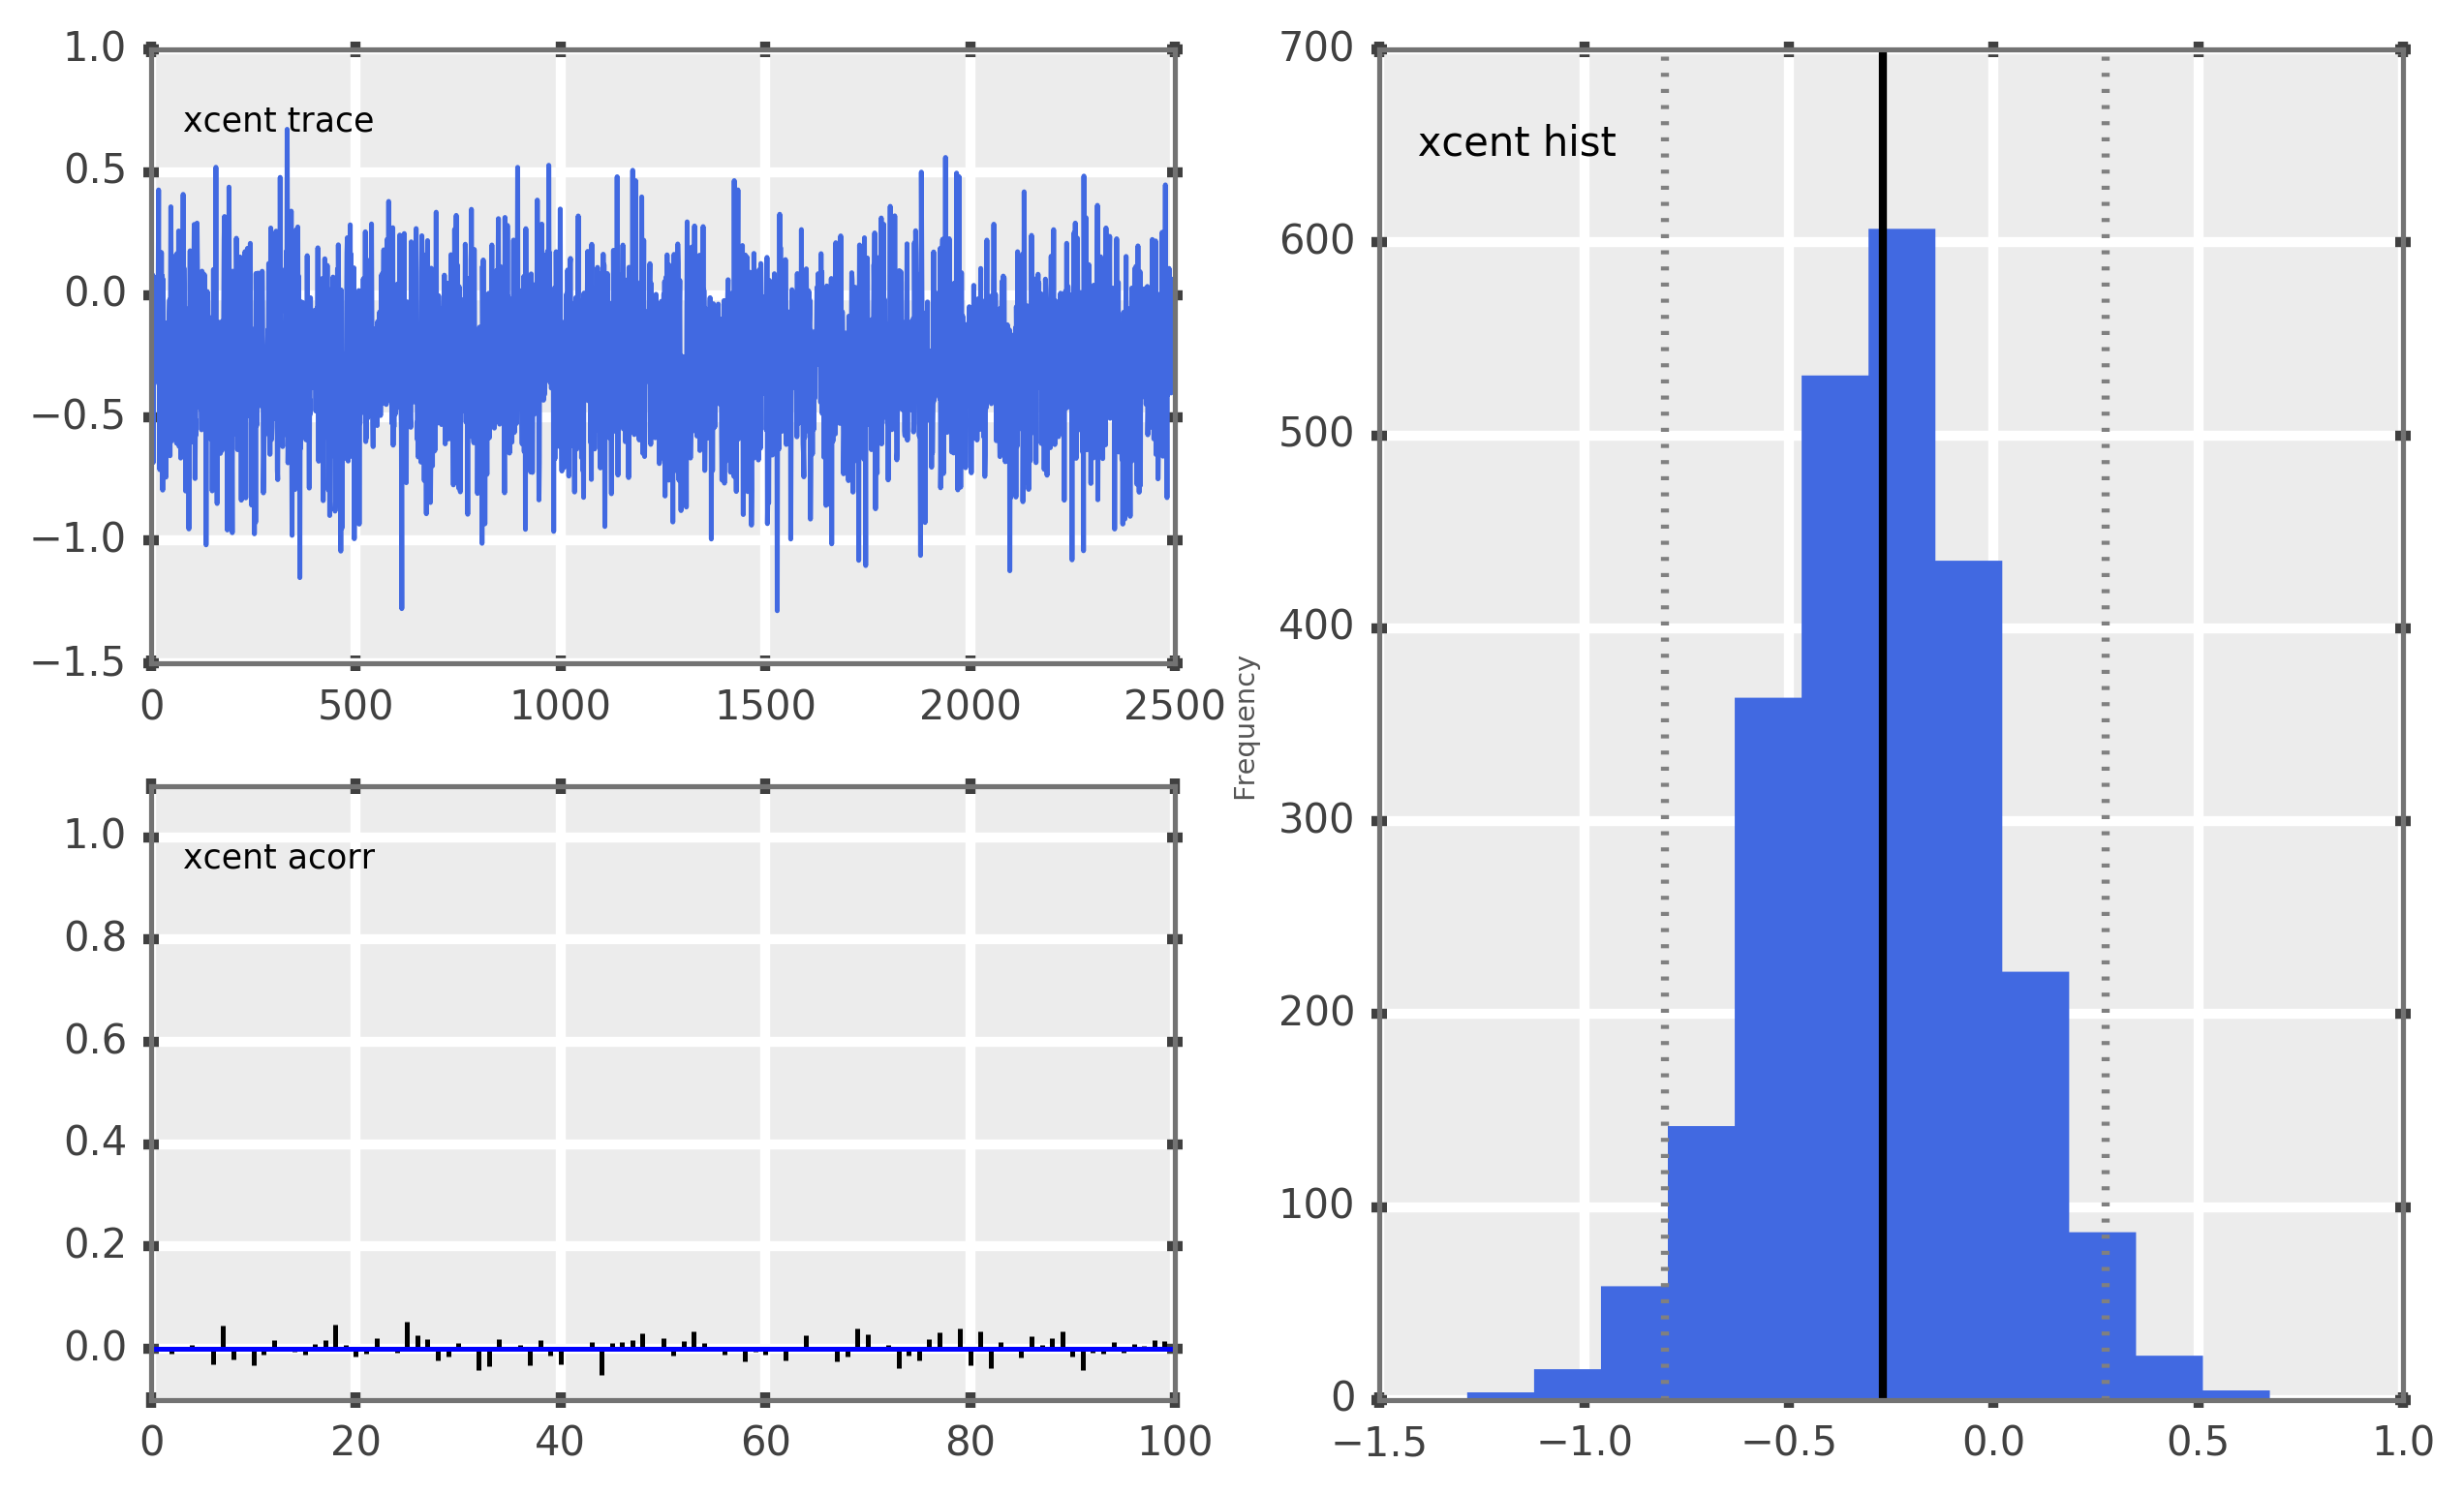

In [34]:
model.sample(50000, burn=100, burn_till_tuned=True, thin=20)


Plotting xcent

xcent:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.277           0.269            0.004            [-0.787  0.251]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.805           -0.457          -0.279         -0.089        0.239
	
None


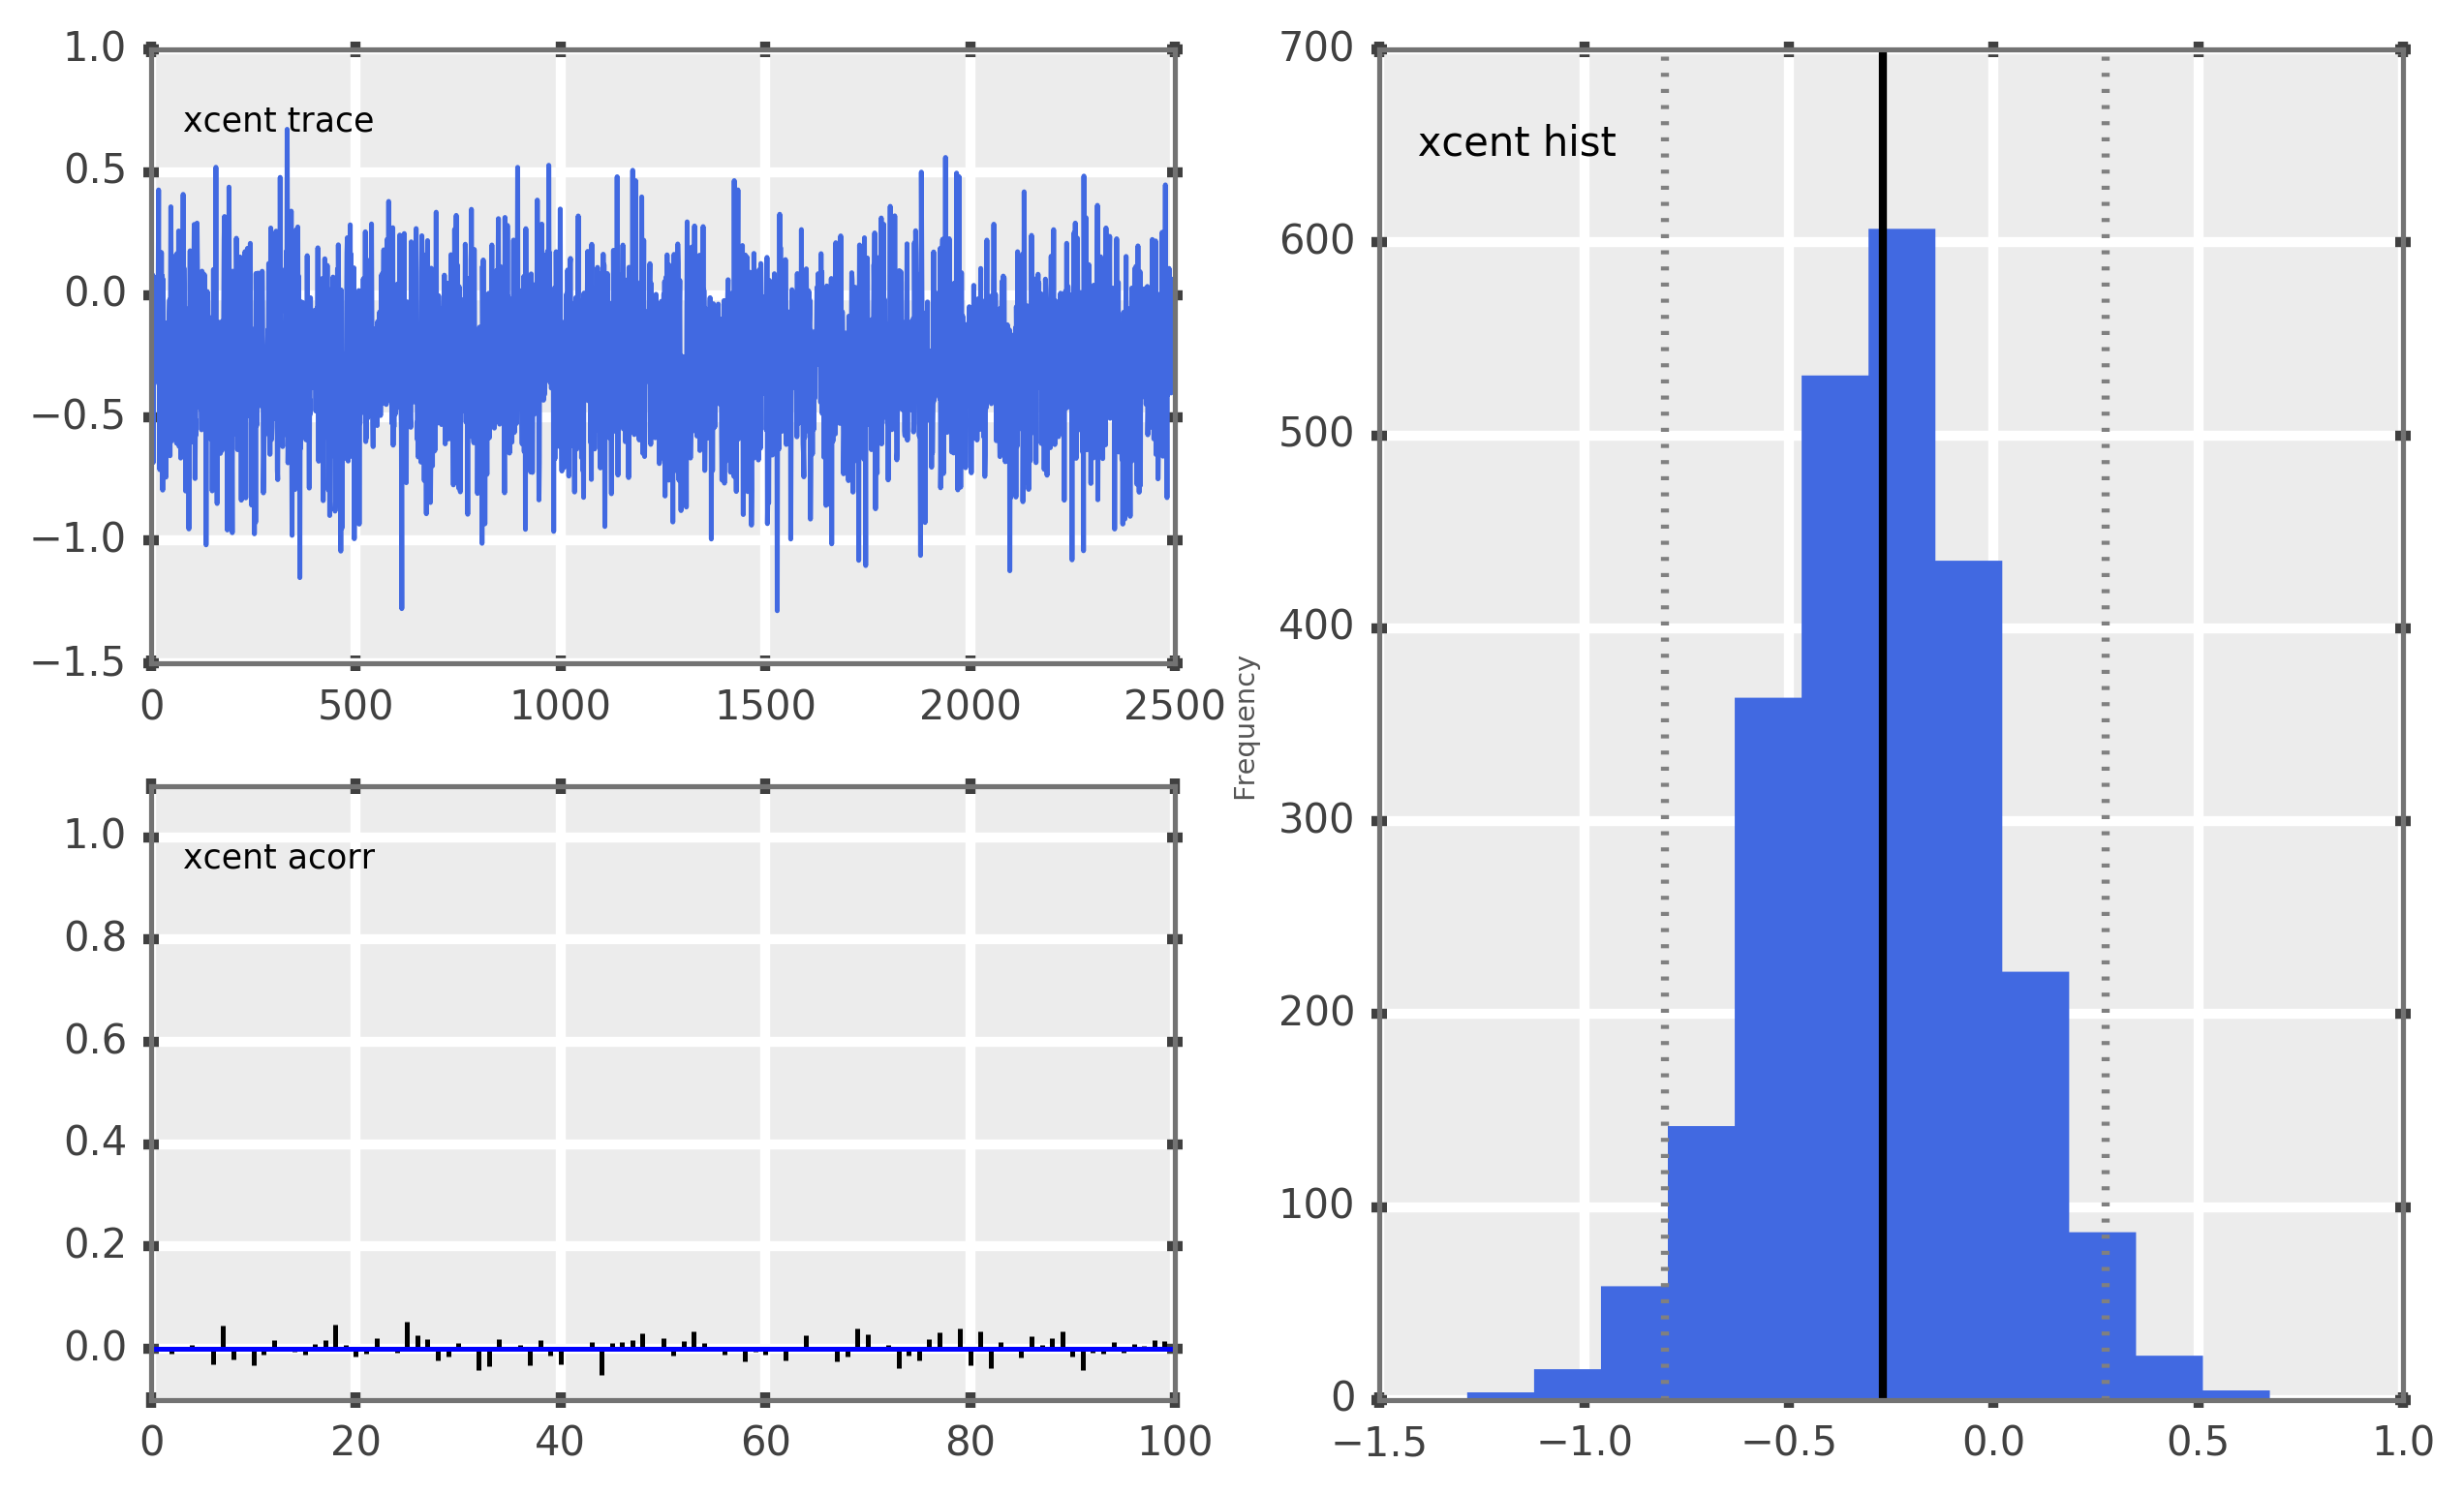

In [37]:
mc.Matplot.plot(model)
pprint(model.summary())

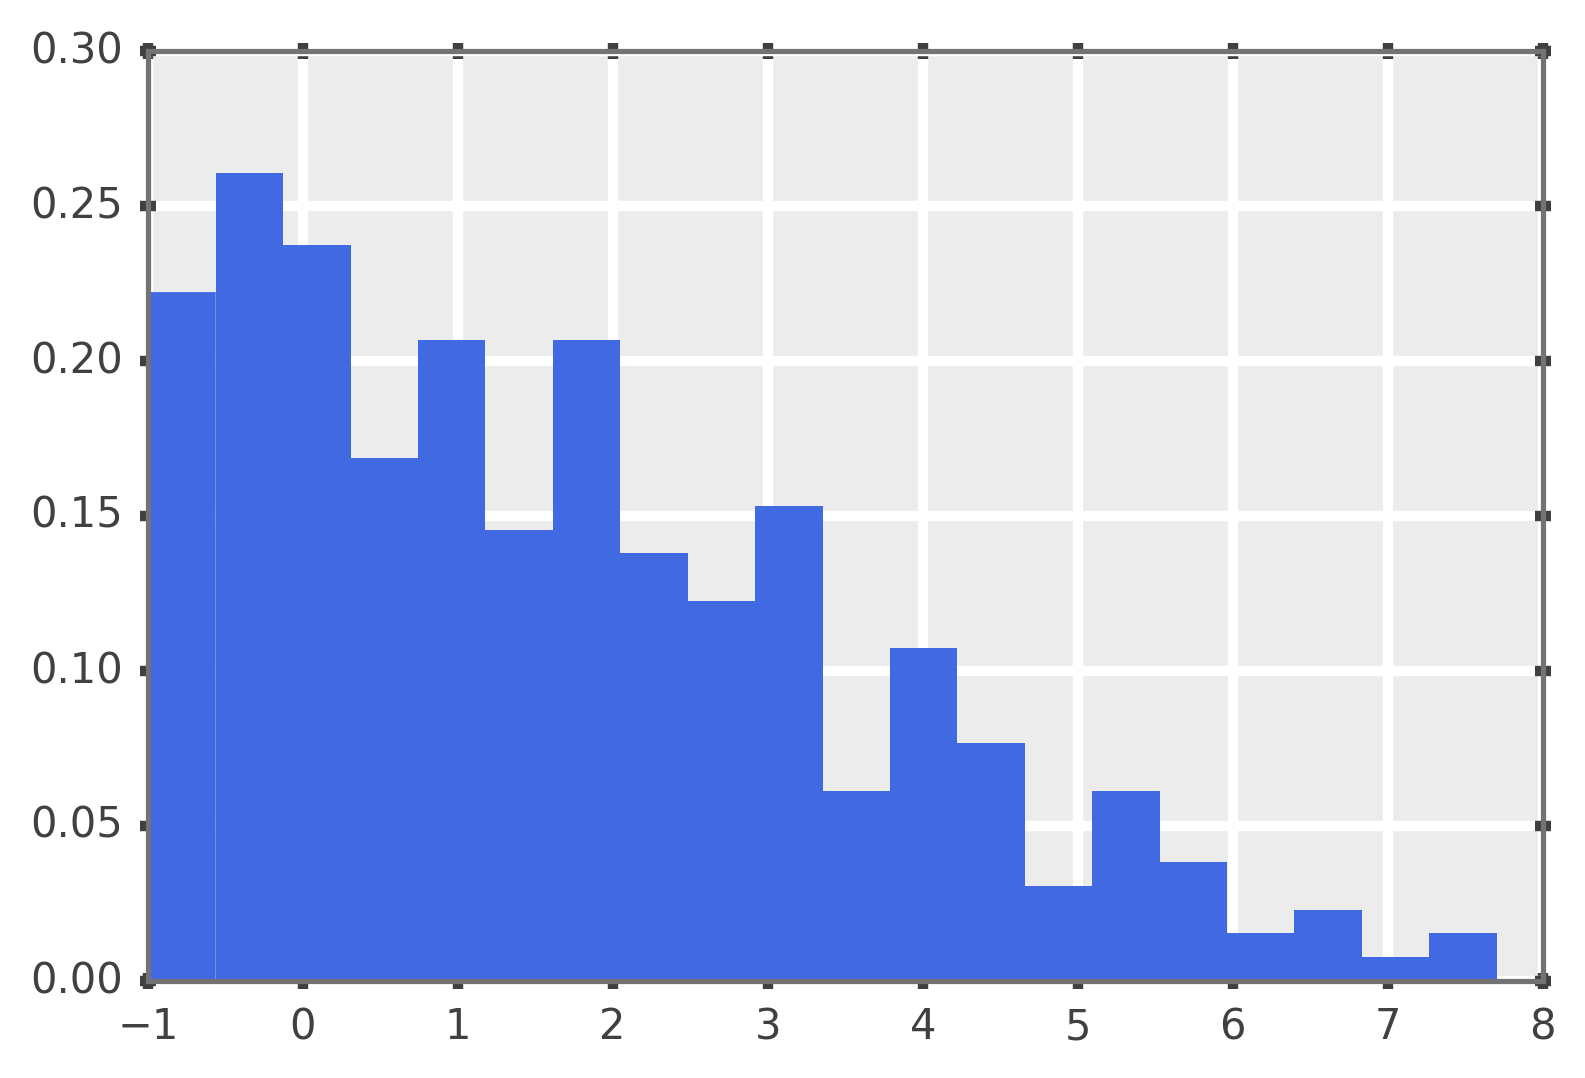

In [42]:
bin, hist, _ = spp.plt.hist(data, 20, normed=True)